In [23]:
import pandas as pd
import numpy as np
import torch, torchvision
import torch.nn as nn
import os
import PIL, cv2
from tqdm import tqdm
tqdm.pandas()
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../scripts/')
from dataset.utils import iou_width_height
from torch.utils.data import DataLoader
from dataset.create_datasets import BirdDataset
from dataset.create_datasets import GetLoaders
import warnings
warnings.filterwarnings("ignore")
from model.model import YOLOv3
from model.train import train_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
np.set_printoptions(suppress=True)

In [65]:
df = helper_dataframe(
    '../../bird_dataset/CUB_200_2011/images.txt', 
    '../../bird_dataset/CUB_200_2011/bounding_boxes.txt', 
    '../../bird_dataset/CUB_200_2011/image_class_labels.txt')

100%|██████████| 11788/11788 [00:33<00:00, 350.71it/s]


In [81]:
# ANCHORS = [
#     [(0.28, 0.22), (0.38, 0.48), (0.9, 0.78)],
#     [(0.07, 0.15), (0.15, 0.11), (0.14, 0.29)],
#     [(0.02, 0.03), (0.04, 0.07), (0.08, 0.06)],
# ]

In [72]:
ds = BirdDataset(df, anchors=ANCHORS, scales=[32, 16, 8])
# dl = DataLoader(ds, batch_size=32, shuffle=False)

In [80]:
# ds.__getitem__(0)[1][2].shape

In [7]:
obj = GetLoaders()
obj.split_datasets()
obj.create_torch_datasets()
obj.create_dataloaders()

100%|██████████| 11788/11788 [00:31<00:00, 375.06it/s]


In [8]:
temp = None
for img, label in obj.train_loader:
    temp = img
    break

In [18]:
np.max(obj.df['labels'].values)

200

In [19]:
model = YOLOv3(num_classes=200)

In [25]:
temp = train_model(model, obj.train_loader)

In [31]:
temp = None
for img in dl:
    temp = img
    break

/home/paperspace/.local/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [32]:
temp

[tensor([[[[  5,   1,   0,  ...,   5,   3,   1],
           [  5,   1,   4,  ...,   5,   3,   2],
           [  3,   3,   7,  ...,   4,   5,   5],
           ...,
           [  5,   2,   3,  ...,   5,   1,   2],
           [  6,   1,   1,  ...,   8,   1,   2],
           [ 11,   0,   1,  ...,   8,   3,   3]],
 
          [[  1,   1,   6,  ...,   1,   2,   3],
           [  3,   0,   2,  ...,   2,   1,   2],
           [  5,   3,   3,  ...,   3,   3,   3],
           ...,
           [  0,   3,   3,  ...,   5,   2,   0],
           [  1,   4,   4,  ...,   2,   1,   0],
           [  0,   0,   4,  ...,   0,   1,   1]],
 
          [[  0,   5,   5,  ...,   9,   1,   0],
           [  5,   4,   4,  ...,   6,   1,   6],
           [  6,   2,   4,  ...,   4,   2,  10],
           ...,
           [  6,   7,   3,  ...,   2,   8,   5],
           [  1,   7,   5,  ...,   5,   9,   6],
           [  0,   1,   2,  ...,   9,   8,   6]]],
 
 
         [[[  0,   1,   6,  ...,   3,   2,   2],
         

In [8]:
df['path'].values.tolist()[:5]

['../../bird_dataset/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg',
 '../../bird_dataset/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg',
 '../../bird_dataset/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg',
 '../../bird_dataset/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg',
 '../../bird_dataset/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg']

In [9]:
df.head()

id                                               path    x    y    w    h  \
0   1  ../../bird_dataset/CUB_200_2011/images/001.Bla...   60   27  325  304   
1   2  ../../bird_dataset/CUB_200_2011/images/001.Bla...  139   30  153  264   
2   3  ../../bird_dataset/CUB_200_2011/images/001.Bla...   14  112  388  186   
3   4  ../../bird_dataset/CUB_200_2011/images/001.Bla...  112   90  255  242   
4   5  ../../bird_dataset/CUB_200_2011/images/001.Bla...   70   50  134  303   

   x_center  y_center  labels  x_c_updated  y_c_updated   w_updated  \
0     222.5     179.0       1   185.120000   222.280597  270.400000   
1     215.5     162.0       1   179.296000   200.571429  127.296000   
2     208.0     205.0       1   173.056000   245.763689  322.816000   
3     239.5     211.0       1   240.077108   175.552000  255.614458   
4     137.0     201.5       1   172.181269   220.589474  168.410876   

    h_updated  
0  377.504478  
1  326.857143  
2  222.985591  
3  201.344000  
4  331.705263

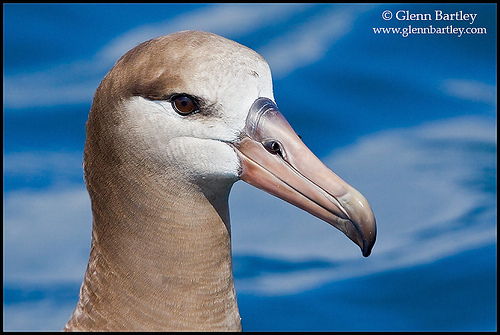

In [14]:
PIL.Image.open(df['path'].values.tolist()[0])

In [21]:
img = torchvision.io.read_image(df['path'].values.tolist()[0])

In [50]:
anchors = [
    [(0.28, 0.22), (0.38, 0.48), (0.9, 0.78)],
    [(0.07, 0.15), (0.15, 0.11), (0.14, 0.29)],
    [(0.02, 0.03), (0.04, 0.07), (0.08, 0.06)],
]

In [55]:
anchs = torch.Tensor(anchors[0] + anchors[1] + anchors[2])

In [56]:
anchs

tensor([[0.2800, 0.2200],
        [0.3800, 0.4800],
        [0.9000, 0.7800],
        [0.0700, 0.1500],
        [0.1500, 0.1100],
        [0.1400, 0.2900],
        [0.0200, 0.0300],
        [0.0400, 0.0700],
        [0.0800, 0.0600]])

In [59]:
9
# [torch.zeros((self.num_anchors // 3, S, S, 6)) for S in self.S]

9

In [64]:
# Check this and how we can incorporate it into the model
torch.zeros(((9 // 3), 13, 13, 6))

tensor([[[[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         ...,

         [[0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0., 0.],
          [0., 0.